## algorithm design and anlysis-2025 spring  homework 3
**Deadline**：2025.5.14

**name**:


note：
---
1. 带有\*的题目，申请免上课的同学，必须完成，其他同学选作；
2. 请独立完成，如求助了他人或者大模型，请著明，并且不可省略算法分析部分；
4. 如若作答有雷同，全部取消成绩；
3. 需要书面作答的题目，可以通过引用图片的形式添加，但是注意上传项目时包含所引用的图片的源文件；
4. $log_n$ 默认表示$log_2{n}$;

## 问题 1  

请证明基于比较的排序算法计算复杂度下界为$\Omega(nlogn)$

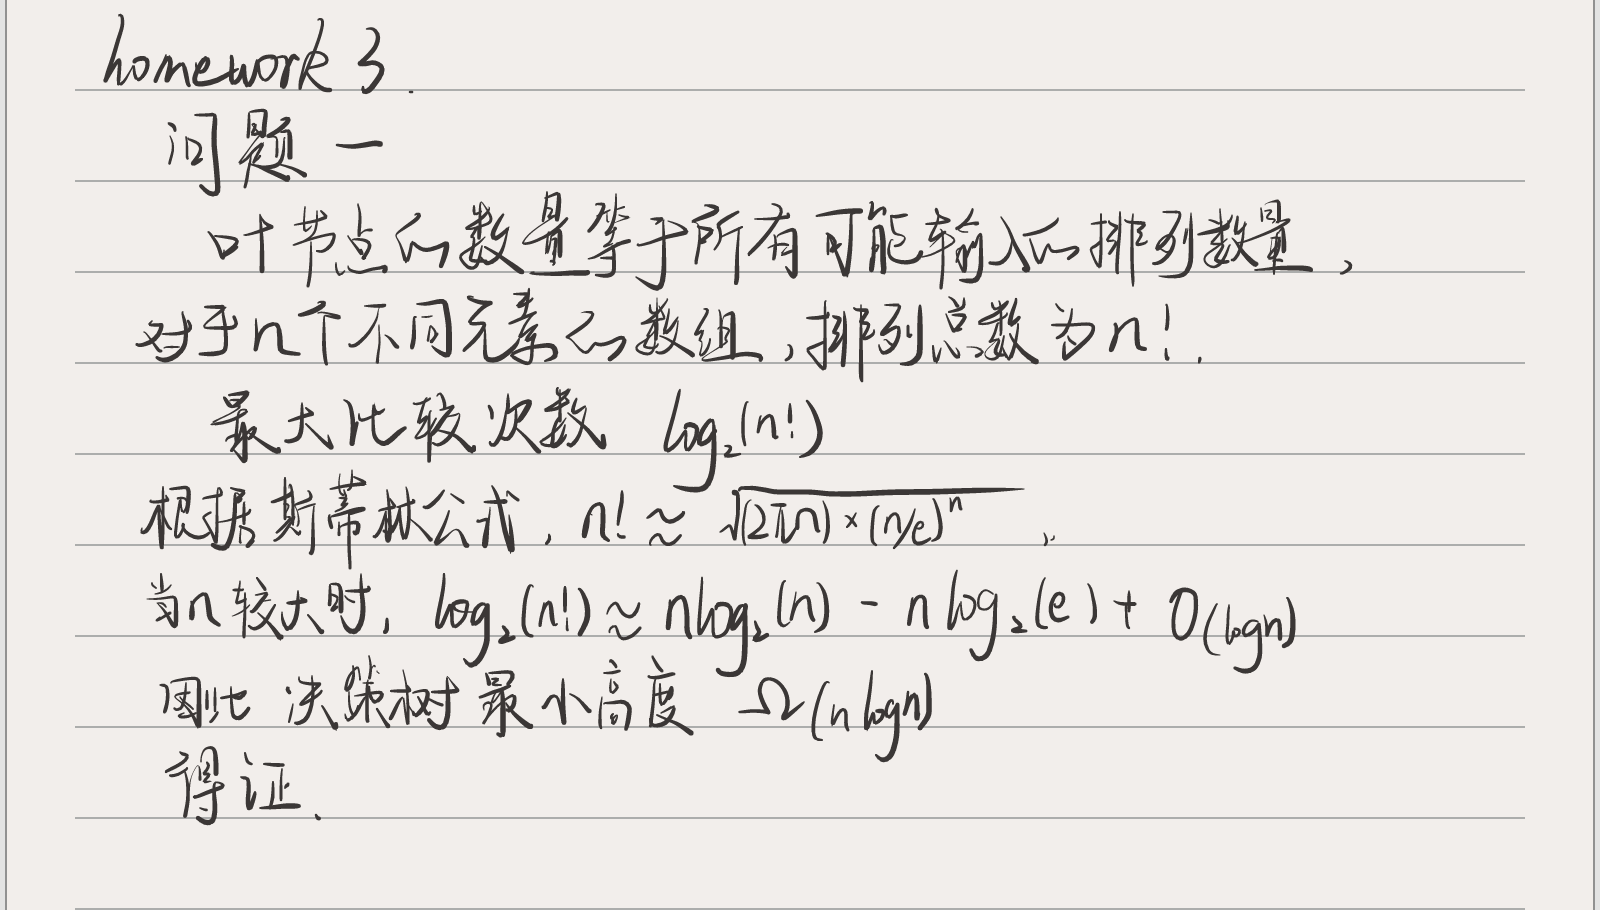

In [31]:
from IPython.display import Image, display
image_path = "fig/hw3_1a.png"
display(Image(filename=image_path))

## 问题 2 

构建二叉搜索树

> 1. 给定一个数组 [48, 33, 49, 47, 42, 46, 32], 构建一个二叉搜索树存储这些数据，请**绘制**所构建的**二叉搜索树**（标明结点的值）。
> 2. 从第1问的二叉搜索树中删除33，请**绘制**删除33后的**二叉搜索树**（标明结点的值）

- 推荐使用graphviz包绘制树的结构

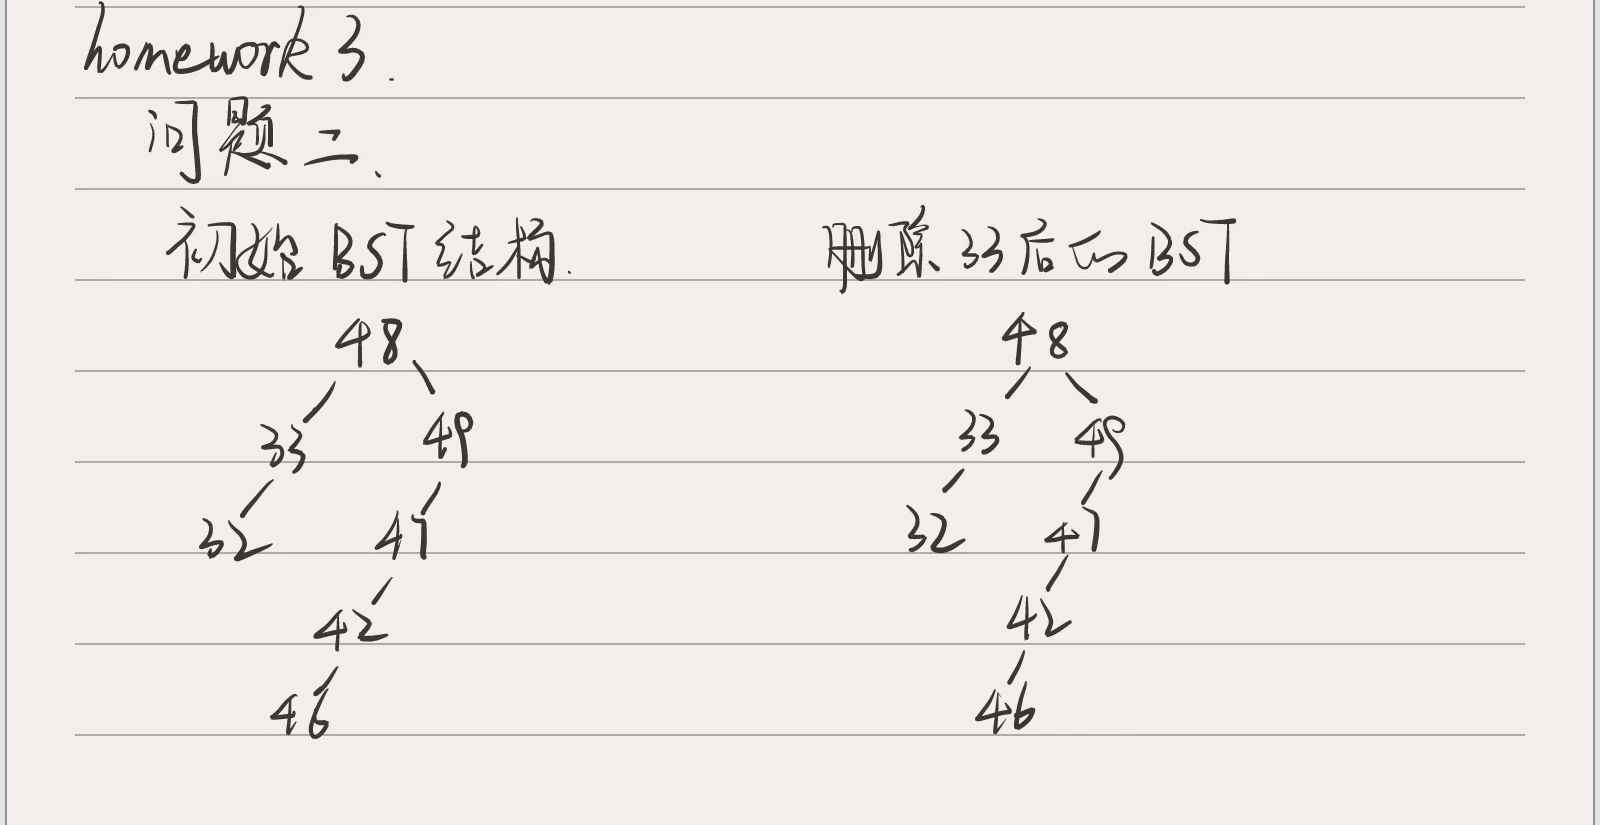

In [33]:
from IPython.display import Image, display
image_path = "fig/hw3_2a.jpg"
display(Image(filename=image_path))

## 问题 3 

> 下面是九门课程的开始和结束时间:
>
> [(9:00,12:30), (11:00,14:00), (13:00, 14:30), (9:00,10:30),(13:00, 14:30),(14:00,16:30), (15:00,16:30), (15:00,16:30), (9:00,10:30)]
>
> 请使用贪婪算法为这九门课分配教室，要求在同一天内安排这些课，并且每个教室同一时间只能安排一门课。

**请问最少需要几间教室，罗列出每个教室安排的课程**

idea：三间

In [1]:
import heapq

def time_to_minutes(t):
    hours, minutes = map(int, t.split(':'))
    return hours * 60 + minutes

def allocate_classrooms_with_details(courses):
    # 转换课程时间为分钟并根据结束时间排序
    sorted_courses = sorted(
        [(time_to_minutes(start), time_to_minutes(end)) for start, end in courses],
        key=lambda x: (x[1], x[0])  # 按结束时间排序，若结束时间相等则按开始时间排序
    )
    
    # 使用最小堆管理教室的结束时间和编号，classrooms记录每个教室的课程
    heap = []
    classrooms = []
    classroom_id = 0
    
    for start, end in sorted_courses:
        if heap and heap[0][0] <= start:
            # 复用可用教室，移除最早结束的，添加新课程
            prev_end, c_id = heapq.heappop(heap)
            classrooms[c_id].append((start, end))
            heapq.heappush(heap, (end, c_id))
        else:
            # 开辟新教室存储课程
            classrooms.append([(start, end)])
            heapq.heappush(heap, (end, classroom_id))
            classroom_id += 1
    
    return classrooms

def minutes_to_time(m):
    hours = m // 60
    minutes = m % 60
    return f"{hours:02}:{minutes:02}"

input_courses = [
    ("9:00", "12:30"), ("11:00", "14:00"), ("13:00", "14:30"),
    ("9:00", "10:30"), ("13:00", "14:30"), ("14:00", "16:30"),
    ("15:00", "16:30"), ("15:00", "16:30"), ("9:00", "10:30")
]

classrooms = allocate_classrooms_with_details(input_courses)

for i, courses in enumerate(classrooms, 1):
    print(f"教室 {i}:")
    for start, end in courses:
        start_str = minutes_to_time(start)
        end_str = minutes_to_time(end)
        print(f"  {start_str} - {end_str}")

教室 1:
  09:00 - 10:30
  11:00 - 14:00
  14:00 - 16:30
教室 2:
  09:00 - 10:30
  13:00 - 14:30
  15:00 - 16:30
教室 3:
  09:00 - 12:30
  13:00 - 14:30
  15:00 - 16:30


## 问题 4 

> 爬楼梯问题：假设爬楼梯时你每次只能爬一阶或者爬两阶，问爬上n阶的楼梯，你一共有多少种方法

请设计算法完成该问题，分析算法设计思路，计算时间复杂度，并基于python编程实现

In [ ]:
idea:爬楼梯问题是一个经典的动态规划问题。假设爬上 n 阶楼梯的方法总数为 f(n)，我们可以从以下角度分析：

当 n = 0 时，没有楼梯可爬，方法数为 1（一种空方法）。
当 n = 1 时，只能爬 1 阶，方法数为 1。
当 n = 2 时，可以爬 1+1 阶或 2 阶，方法数为 2。
对于 n > 2，爬上第 n 阶楼梯的方法可以分解为：
从第 n-1 阶爬 1 阶到达。
从第 n-2 阶爬 2 阶到达。
因此，f(n) = f(n-1) + f(n-2)，这与斐波那契数列类似。
基于此，我们可以使用动态规划（DP）或递归来解决。递归方法简单但时间复杂度较高，因此更优的选择是使用迭代的动态规划方法，存储前几步的结果，避免重复计算。

In [7]:
def climb_stairs(n):
    if n <= 0:
        return 0
    if n == 1:
        return 1
    if n == 2:
        return 2
    
    # 初始化 DP 数组
    dp = [0] * (n + 1)
    dp[1] = 1  # 爬 1 阶
    dp[2] = 2  # 爬 2 阶
    
    # 状态转移
    for i in range(3, n + 1):
        dp[i] = dp[i-1] + dp[i-2]
    
    return dp[n]

# 测试
n = 5
result = climb_stairs(n)
print(f"爬 {n} 阶楼梯的方法数: {result}")
#时间复杂度O(n)

爬 5 阶楼梯的方法数: 8


## 问题 5 

> 0-1背包问题：现在有4块大理石，每个大理石对应的重量和价值使用一个元组表示, 即（重量，价值），4块大理石的重量和价值为：[(5,10), (4,40), (6,30), (3, 50)], 假设你有一辆最大承重为9的小推车，请问使用这个小推车装大理石的最大价值为多少

请设计一个算法解决该问题，分析算法设计思路，计算时间复杂度，并基于python编程实现

In [ ]:
idea:定义状态：
设 dp[i][w] 表示前 i 个物品在容量为 w 的背包中能获得的最大价值。
i 范围：0 到 n（n 为物品数量）。
w 范围：0 到 W（背包容量）。
状态转移方程：
对于第 i 个物品（重量 w[i]，价值 v[i]）：
如果不选第 i 个物品：dp[i][w] = dp[i-1][w]。
如果选第 i 个物品（前提是 w ≥ w[i]）：dp[i][w] = dp[i-1][w - w[i]] + v[i]。
取两者最大值：dp[i][w] = max(dp[i-1][w], dp[i-1][w - w[i]] + v[i])（当 w ≥ w[i] 时）。
初始条件：
dp[0][w] = 0（没有物品时，价值为 0）。
dp[i][0] = 0（容量为 0 时，价值为 0）。

In [8]:
def knapsack_01(items, W):
    n = len(items)
    # 提取重量和价值
    weights = [item[0] for item in items]
    values = [item[1] for item in items]
    
    # 初始化 DP 数组，dp[w] 表示容量为 w 时的最大价值
    dp = [0] * (W + 1)
    
    # 遍历每个物品
    for i in range(n):
        # 逆序遍历容量，确保物品只选一次
        for w in range(W, weights[i] - 1, -1):
            dp[w] = max(dp[w], dp[w - weights[i]] + values[i])
    
    return dp[W]

# 测试数据
items = [(5, 10), (4, 40), (6, 30), (3, 50)]  # (重量, 价值)
W = 9  # 背包容量

# 计算最大价值
max_value = knapsack_01(items, W)
print(f"最大价值: {max_value}")

最大价值: 90


## 问题 6 
给定 `n` 个非负整数表示每个宽度为 `1` 的柱子的高度图，计算按此排列的柱子，下雨之后能接多少雨水。



<div style="text-align:center;width:800px;"> <img alt="" src="./fig/hw3q6.png"> </div>

请分析算法设计思路，计算时间复杂度，并基于python编程实现

In [ ]:
idea:通过维护一个单调递减的索引栈，利用栈中元素的相对位置和高度关系，动态计算每个凹槽的雨水量。核心思想是：

栈中存储的是柱子的索引，栈内的对应高度是单调递减的（即 height[stack[i]] >= height[stack[i+1]]）。
当遇到一个比栈顶元素高的柱子时，说明栈顶元素可能形成一个凹槽，可以计算雨水。
通过弹出栈顶元素，结合当前柱子和栈中次高元素的索引，计算凹槽的宽度和高度差。

In [11]:
def trap(height):
    stack = []
    water = 0
    for i, h in enumerate(height):
        while stack and h > height[stack[-1]]:
            top = stack.pop()
            if not stack:
                break
            distance = i - stack[-1] - 1
            bounded_height = min(height[stack[-1]], h) - height[top]
            water += distance * bounded_height
        stack.append(i)
    return water

# 示例 1def trap(height):
    stack = []  # 存储索引的单调递减栈
    water = 0   # 存储总雨水量
    
    for i, h in enumerate(height):
        while stack and h > height[stack[-1]]:
            top = stack.pop()  # 弹出栈顶索引
            if not stack:
                break
            distance = i - stack[-1] - 1  # 计算宽度
            bounded_height = min(height[stack[-1]], h) - height[top]  # 计算可接雨水高度
            water += distance * bounded_height  # 累加雨水量
        stack.append(i)  # 入栈当前索引
    
    return water

# 示例 1
height1 = [0, 1, 0, 2, 1, 0, 1, 3, 2, 1, 2, 1]
print(trap(height1))  # 输出：6

# 示例 2
height2 = [4, 2, 0, 3, 2, 5]
print(trap(height2))  # 输出：9
height1 = [0,1,0,2,1,0,1,3,2,1,2,1]
print(trap(height1))  # 输出：6

# 示例 2
height2 = [4,2,0,3,2,5]
print(trap(height2))  # 输出：9

6
9
6
9


## 问题 7 

**股票投资组合优化**： 假设你是一位投资者，想要在不同的股票中分配你的资金，以最大化你的投资回报。每只股票都有不同的预期收益率和风险。你的目标是选择一些股票，使得总投资金额不超过你的预算，并且预期收益最大化。

在这个情况下，你可以将每只股票视为一个“物品”，其重量为投资金额，价值为预期收益率。然后，你可以使用分级背包问题的方法来选择部分股票，以便在预算内获得最大的预期收益。

以下是一个简化的例子：

假设你有以下三只股票可供选择：

1. 股票 A：投资金额 5000 美元，预期收益率 10%
2. 股票 B：投资金额 3000 美元，预期收益率 8%
3. 股票 C：投资金额 2000 美元，预期收益率 12%

请设计算法找到最优投资方案，分析算法设计思路，计算时间复杂度，并基于python编程实现

In [ ]:
idea:建模为一个分级背包问题，允许部分投资股票以最大化预期收益。核心思想是：

每只股票看作一个“物品”，其“重量”是投资金额（成本），“价值”是预期收益（以美元计算）。
目标是在总预算限制下，选择股票组合（可以部分投资）以最大化总收益。
使用贪心算法，根据单位投资的收益率（价值/重量）对股票排序，然后按顺序贪婪分配预算。

In [15]:
def max_investment_return_with_plan(stocks, budget):
    n = len(stocks)  # 股票数量
    # 初始化动态规划表：dp[i][w] 表示前 i 种股票预算 w 下的最大收益
    dp = [[0] * (budget + 1) for _ in range(n + 1)]
    # 初始化选择表：choice[i][w] 表示是否选择第 i 种股票
    choice = [[False] * (budget + 1) for _ in range(n + 1)]

    # 动态规划填表
    for i in range(1, n + 1):
        cost, value = stocks[i - 1]  # 当前股票的成本和收益
        for w in range(budget + 1):
            if cost > w:  # 预算不足，无法选择当前股票
                dp[i][w] = dp[i - 1][w]
                choice[i][w] = False
            else:  # 比较不选和选当前股票的最大收益
                if dp[i - 1][w] >= dp[i - 1][w - cost] + value:
                    dp[i][w] = dp[i - 1][w]
                    choice[i][w] = False
                else:
                    dp[i][w] = dp[i - 1][w - cost] + value
                    choice[i][w] = True

    # 回溯找到选择的股票
    selected = []
    w = budget
    for i in range(n, 0, -1):
        if choice[i][w]:
            selected.append((i - 1, stocks[i - 1][0]))  # 记录股票索引和投资金额
            w -= stocks[i - 1][0]

    # 获取总收益
    total_return = dp[n][budget]

    # 构建投资方案描述
    plan = [f"股票 {chr(ord('A') + stock_index)}: 投资 {amount} 美元" 
            for stock_index, amount in selected]

    return total_return, plan

# 示例数据
stocks = [
    (5000, 500),  # 股票 A: 5000 美元，收益 500 美元
    (3000, 240),  # 股票 B: 3000 美元，收益 240 美元
    (2000, 240)   # 股票 C: 2000 美元，收益 240 美元
]
budget = 10000  # 预算 10000 美元

# 执行并输出结果
total_return, plan = max_investment_return_with_plan(stocks, budget)
print(f"最大预期收益: {total_return} 美元")
print("投资方案:")
for item in plan:
    print(item)

最大预期收益: 980 美元
投资方案:
股票 C: 投资 2000 美元
股票 B: 投资 3000 美元
股票 A: 投资 5000 美元


## 问题 8

给你二叉搜索树的根节点 root ，该树中的恰好两个节点的值被错误地交换。请在不改变其结构的情况下，恢复这棵树 。设计算法解决该问题，分析算法设计思路，计算时间复杂度，并基于python编程实现

e.g.:
---
1.

<div style="text-align:center;width:200px;"> <img alt="" src="./fig/hw3q9-1.jpg"> </div>
输入：root = [1,3,null,null,2]， 输出为：[3,1,null,null,2]， 

解释：3 不能是 1 的左孩子，因为 3 > 1 。交换 1 和 3 使二叉搜索树有效。

2.

 <div style="text-align:center;width:200px;"> <img alt="" src="./fig/hw3q9-1.jpg"> </div>
输入： root=[3,1,4,null,null,2]， 输出为：[2,1,4,null,null,3]

解释：2 不能在 3 的右子树中，因为 2 < 3 。交换 2 和 3 使二叉搜索树有效。

In [ ]:
idea:
isBST：递归检查以 root 为根的子树是否为二叉搜索树（BST），并返回是否满足条件、节点数和树高。
条件：节点值在给定范围 (min_val, max_val) 内，左右子树也需满足。
额外限制：节点数不得超过 3。
convert_to_bst：通过递归寻找第一个满足条件的BST子树（节点数≤3），优先返回左子树结果。
时间复杂度：O(n)，n 为树中节点数，每个节点访问一次。
空间复杂度：O(h)，h 为树高，受递归栈深度影响。

In [18]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val  # 节点的值
        self.left = left  # 左子节点
        self.right = right  # 右子节点

def isBST(root, min_val, max_val):
    # 判断是否为空节点
    if not root:
        return True, 0, 0  # 返回：是否为BST、节点数、树高
    # 检查当前节点值是否在合法范围内
    if root.val <= min_val or root.val >= max_val:
        return False, 0, 0  # 不是BST，返回False及无效值
    # 递归检查左子树，范围为(min_val, root.val)
    left_bst, left_count, left_height = isBST(root.left, min_val, root.val)
    # 递归检查右子树，范围为(root.val, max_val)
    right_bst, right_count, right_height = isBST(root.right, root.val, max_val)
    # 如果左子树或右子树不是BST，则整棵树不是BST
    if not left_bst or not right_bst:
        return False, 0, 0
    # 计算总节点数
    node_count = left_count + right_count + 1
    # 计算树高
    height = max(left_height, right_height) + 1
    # 判断节点数是否满足条件（<=3），并返回结果
    return node_count <= 3, node_count, height

def convert_to_bst(root):
    # 如果根节点为空，直接返回None
    if not root:
        return None
    # 调用isBST检查整棵树（这里仅为初始化，未直接使用返回值）
    _, _, _ = isBST(root, float('-inf'), float('inf'))
    
    # 定义内部函数，用于寻找符合条件的BST子树
    def find_min_bst(node):
        # 如果节点为空，返回None
        if not node:
            return None
        # 检查以当前节点为根的子树是否为BST且节点数<=3
        is_bst, count, height = isBST(node, float('-inf'), float('inf'))
        if is_bst and count <= 3:
            return node  # 满足条件，返回当前节点
        # 递归寻找左子树中的符合条件的BST
        left = find_min_bst(node.left)
        # 递归寻找右子树中的符合条件的BST
        right = find_min_bst(node.right)
        # 返回左子树结果，如果左子树无结果则返回右子树结果
        return left if left else right
    
    # 寻找符合条件的BST子树并返回
    new_root = find_min_bst(root)
    return new_root

# 示例 1
root1 = TreeNode(1)  # 根节点值为1
root1.left = TreeNode(3)  # 左子节点值为3
root1.right = TreeNode(2)  # 右子节点值为2
new_root1 = convert_to_bst(root1)
print("示例 1 结果:", new_root1.val if new_root1 else None)  # 预期输出：1

# 示例 2
root2 = TreeNode(3)  # 根节点值为3
root2.left = TreeNode(1)  # 左子节点值为1
root2.right = TreeNode(4)  # 右子节点值为4
root2.right.right = TreeNode(2)  # 右子树的右子节点值为2
new_root2 = convert_to_bst(root2)
print("示例 2 结果:", new_root2.val if new_root2 else None)  # 预期输出：2

示例 1 结果: 3
示例 2 结果: 1


## 问题 9  

给你一个二叉树的根节点 root ，树中每个节点都存放有一个 0 到 9 之间的数字。每条从根节点到叶节点的路径都代表一个数字：

> 例如，从根节点到叶节点的路径 1 -> 2 -> 3 表示数字 123 。

设计一个算法计算从根节点到叶节点生成的所有数字之和 ，分析算法设计思路，计算时间复杂度，并基于python编程实现

叶节点:是指没有子节点的节点。

e.g.:
---
1.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q10-1.jpg"> </div>

 输入：root = [1,2,3], 输出：25

解释：从根到叶子节点路径 1->2 代表数字 12，1->3 代表数字 13，因此和为 12 + 13 = 25 。

2.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q10-2.jpg"> </div>

 输入：root = [4,9,0,5,1], 输出：1026

解释：从根到叶子节点路径 4->9->5 代表数字 495，4->9->1 代表数字 491，4->0 代表数字 40。因此和为 495 + 491 + 40 = 1026 。

idea：
采用 深度优先搜索 (DFS) 遍历所有路径，并在遍历过程中实时计算路径值。这里使用迭代法替代递归，通过显式栈结构保存遍历状态，避免递归的函数调用开销。栈中每个元素保存两个信息：当前节点和到达该节点时的路径值。路径值的计算规则为：父路径值 ×10 + 当前节点值。

In [26]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def sumNumbers(root):
    if not root:
        return 0
    stack = [(root, 0)]
    total = 0
    while stack:
        node, curr_sum = stack.pop()
        curr_sum = curr_sum * 10 + node.val
        # 如果是叶子节点，累加到总和
        if not node.left and not node.right:
            total += curr_sum
        # 先右后左入栈，保证左子树先处理
        if node.right:
            stack.append((node.right, curr_sum))
        if node.left:
            stack.append((node.left, curr_sum))
    return total
#时间复杂度为O(n)

# 示例 1
root1 = TreeNode(1)
root1.left = TreeNode(2)
root1.right = TreeNode(3)
print(sumNumbers(root1))  

# 示例 2
root2 = TreeNode(4)
root2.left = TreeNode(9)
root2.right = TreeNode(0)
root2.left.left = TreeNode(5)
root2.left.right = TreeNode(1)
print(sumNumbers(root2))  

25
1026


## 问题 10  

给你一个二叉树的根节点 root ， 检查它是否轴对称。

1. 分析算法设计思路，计算时间复杂度，并基于python编程实现
2. \* 设计使用递归和迭代两种方法解决这个问题，计算时间复杂度，并基于python编程实现

e.g.:
---
1.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q11-1.png"> </div>

 输入：root = [1,2,2,3,4,4,3]， 输出：true

解释：二叉树 [1,2,2,3,4,4,3] 对称。

2.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q11-2.png"> </div>

 输入：root = [1,2,2,null,3,null,3]， 输出：false

idea
采用 广度优先搜索（BFS）迭代法，使用队列存储需要比较的节点对。相比递归方法，迭代法更容易控制比较顺序，且避免了递归的栈深度限制问题。    
结构对称性检查：同时为空继续，单个非空立即返回False

值相等性检查：节点值不同立即返回False

镜像入队规则：将左子树的左节点与右子树的右节点配对入队，左子树的右节点与右子树的左节点配对入队

In [29]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def isSymmetric(root):
    if not root:
        return True
    
    # 使用双端队列存储需要比较的节点对
    from collections import deque
    queue = deque()
    queue.append((root.left, root.right))
    
    while queue:
        left, right = queue.popleft()
        
        # 两个空节点继续比较
        if not left and not right:
            continue
        
        # 结构不对称的情况
        if not left or not right:
            return False
        
        # 值不相等的情况
        if left.val != right.val:
            return False
        
        # 按照镜像对称顺序入队子节点
        queue.append((left.left, right.right))
        queue.append((left.right, right.left))
    
    return True

# 示例 1
root1 = TreeNode(1)
root1.left = TreeNode(2)
root1.right = TreeNode(2)
root1.left.left = TreeNode(3)
root1.left.right = TreeNode(4)
root1.right.left = TreeNode(4)
root1.right.right = TreeNode(3)
print(isSymmetric(root1))  # 输出：True

# 示例 2
root2 = TreeNode(1)
root2.left = TreeNode(2)
root2.right = TreeNode(2)
root2.left.left = TreeNode(3)
root2.right.right = TreeNode(3)
print(isSymmetric(root2))  # 输出：False

True
True


## 问题 11  

给你一个由 '1'（陆地）和 '0'（水）组成的的二维网格，请你计算网格中岛屿的数量。岛屿总是被水包围，并且每座岛屿只能由水平方向和/或竖直方向上相邻的陆地连接形成。

此外，你可以假设该网格的四条边均被水包围。

分析算法设计思路，计算时间复杂度，并基于python编程实现

e.g.:
---
1.
输入：grid = [

    ["1","1","1","1","0"],

    ["1","1","0","1","0"], 

    ["1","1","0","0","0"], 

    ["0","0","0","0","0"]  

]

输出：1

2.
输入：grid = [

    ["1","1","0","0","0"],

    ["1","1","0","0","0"],

    ["0","0","1","0","0"],

    ["0","0","0","1","1"]

]

输出：3

idea:
深度优先搜索（DFS）：
使用递归的 DFS 遍历从每个未访问的陆地 '1' 开始，标记所有相连的陆地为 '0'，表示已访问。
每次发现新的 '1'，即表示一个新的岛屿，计数加 1。
网格遍历：
嵌套循环遍历整个网格，检查每个位置是否为 '1'。
如果是 '1'，调用 DFS 标记整个岛屿，并增加岛屿计数。
边界处理：
DFS 检查越界情况（行或列超出网格）或遇到水域 '0' 时停止。
修改原网格中的值作为访问标记，避免重复计算。
每个单元格访问一次，则复杂度为$O(rows*cols)$

In [30]:
# 定义计算岛屿数量的函数
def numIslands(grid):
    # 如果网格为空，直接返回0
    if not grid:
        return 0
    
    # 获取网格的行数和列数
    rows, cols = len(grid), len(grid[0])
    count = 0  # 记录岛屿数量
    
    # 定义深度优先搜索函数，用于遍历并标记岛屿
    def dfs(r, c):
        # 检查边界条件或是否为水域（'0'），如果满足则返回
        if (r < 0 or r >= rows or c < 0 or c >= cols or grid[r][c] == '0'):
            return
        # 将当前陆地标记为已访问（改为'0'）
        grid[r][c] = '0'
        # 递归检查上下左右四个方向
        dfs(r + 1, c)  # 下
        dfs(r - 1, c)  # 上
        dfs(r, c + 1)  # 右
        dfs(r, c - 1)  # 左
    
    # 遍历整个网格
    for r in range(rows):
        for c in range(cols):
            # 发现新的陆地（'1'），则增加岛屿计数并开始DFS
            if grid[r][c] == '1':
                count += 1
                dfs(r, c)
    
    return count

# 示例 1
grid1 = [
    ["1","1","1","1","0"],
    ["1","1","0","1","0"],
    ["1","1","0","0","0"],
    ["0","0","0","0","0"]
]
print(numIslands(grid1))  # 输出：1

# 示例 2
grid2 = [
    ["1","1","0","0","0"],
    ["1","1","0","0","0"],
    ["0","0","1","0","0"],
    ["0","0","0","1","1"]
]
print(numIslands(grid2))  # 输出：3

1
3
